In [1]:
import pandas as pd
import numpy as np
import quandl
import requests
from dotenv import load_dotenv
import os
import alpaca_trade_api as tradeapi
import nasdaqdatalink
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Get gas stock data for Gulf War
tickerStrings = ["XOM", "BP", "COP", "CVX"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="1990-02-01", end="1990-12-31")
    data["ticker"] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
    df_list.append(data)

# combine all dataframes into a single dataframe
gas_gulf_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
gas_gulf_df

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
1990-02-01,11.81250,11.84375,11.75000,11.75000,3.956183,2903200,XOM
1990-02-02,11.78125,11.96875,11.75000,11.96875,4.029837,4246400,XOM
1990-02-05,12.00000,12.09375,11.96875,12.00000,4.040359,5880400,XOM
1990-02-06,11.84375,11.87500,11.56250,11.81250,4.027570,4739600,XOM
1990-02-07,11.75000,12.00000,11.68750,12.00000,4.091502,4108800,XOM
...,...,...,...,...,...,...,...
1990-12-21,18.25000,18.25000,17.87500,17.87500,5.578168,4733200,CVX
1990-12-24,17.84375,17.84375,17.71875,17.81250,5.558664,427600,CVX
1990-12-26,17.87500,18.31250,17.81250,18.31250,5.714697,1192400,CVX


In [4]:
# Convert dataframe to csv
gas_gulf_df.to_csv("gas_gulf.csv")

In [5]:
gas_gulf_df = gas_gulf_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])

In [6]:
gas_gulf_df = gas_gulf_df.pivot(columns = "ticker", values = "Close")

In [7]:
gas_gulf_df

ticker,BP,COP,CVX,XOM
Date,,,,
1990-02-01,17.46875,9.767181,16.65625,11.75000
1990-02-02,17.50000,9.767181,16.78125,11.96875
1990-02-05,17.56250,9.767181,16.87500,12.00000
1990-02-06,17.50000,9.862470,16.78125,11.81250
1990-02-07,17.40625,9.957760,16.96875,12.00000
...,...,...,...,...
1990-12-21,18.93750,10.053050,17.87500,12.68750
1990-12-24,18.90625,10.005405,17.81250,12.81250
1990-12-26,19.15625,10.243629,18.31250,12.93750


In [8]:
def plot_graph(df, title:str, y_label: str):
    
        ## graphing the data

    cols =[col for col in df.columns]

    fig,ax = plt.subplots(1,1, figsize = (14,6))
    plt.style.use("seaborn")

    for c in cols: 
        ax.plot(c, linewidth=2, data=df)
        ax.set_title(title)
        plt.xlabel("Date")
        plt.ylabel(y_label)

        handles,labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc="upper left", prop = {"size":10})

    plt.show()

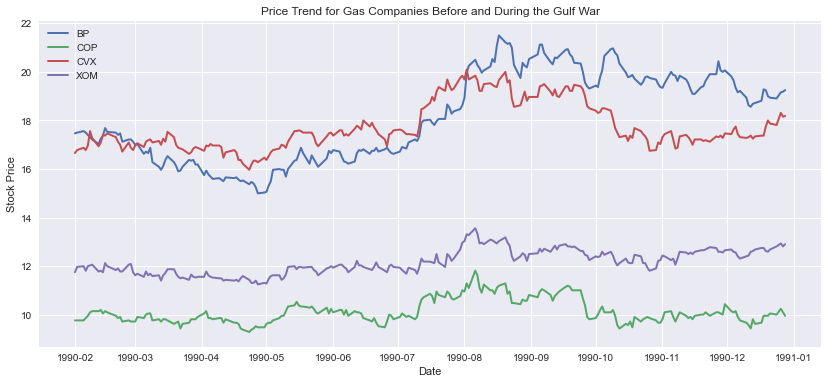

In [10]:
plot_graph(gas_gulf_df, title="Price Trend for Gas Companies Before and During the Gulf War", y_label="Stock Price")

In [11]:
# Get gas stock data for Russia-Ukraine Invasion
tickerStrings = ["XOM", "BP", "COP", "CVX"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="2021-08-24", end="2022-06-30")
    data["ticker"] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
    df_list.append(data)

# combine all dataframes into a single dataframe
gas_rusua_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
gas_rusua_df

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2021-08-24,55.290001,55.849998,55.009998,55.360001,53.479130,17915600,XOM
2021-08-25,55.240002,55.770000,54.869999,55.459999,53.575729,13270300,XOM
2021-08-26,55.200001,55.540001,54.630001,54.709999,52.851212,11842600,XOM
2021-08-27,55.400002,56.209999,55.400002,55.770000,53.875202,15822500,XOM
2021-08-30,56.240002,56.340000,55.119999,55.160000,53.285923,14086100,XOM
...,...,...,...,...,...,...,...
2022-06-23,148.789993,149.229996,140.149994,142.429993,142.429993,15713700,CVX
2022-06-24,145.199997,147.089996,142.600006,144.770004,144.770004,11108300,CVX
2022-06-27,145.860001,148.820007,145.600006,147.570007,147.570007,9242400,CVX


In [13]:
# Convert dataframe to csv
gas_rusua_df.to_csv("gas_rusua.csv")

In [14]:
gas_rusua_df = gas_rusua_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])

In [15]:
gas_rusua_df = gas_rusua_df.pivot(columns = "ticker", values = "Close")

In [16]:
gas_rusua_df

ticker,BP,COP,CVX,XOM
Date,,,,
2021-08-24,24.650000,55.410000,97.839996,55.360001
2021-08-25,24.629999,56.020000,98.510002,55.459999
2021-08-26,24.299999,55.130001,97.220001,54.709999
2021-08-27,24.940001,56.740002,98.639999,55.770000
2021-08-30,24.700001,56.200001,98.389999,55.160000
...,...,...,...,...
2022-06-23,27.360001,87.889999,142.429993,85.209999
2022-06-24,28.230000,90.910004,144.770004,86.900002
2022-06-27,28.700001,92.230003,147.570007,89.029999


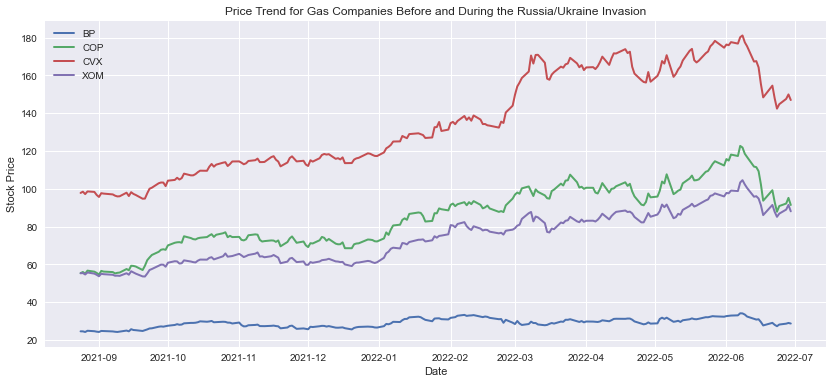

In [17]:
plot_graph(gas_rusua_df, title="Price Trend for Gas Companies Before and During the Russia/Ukraine Invasion", y_label="Stock Price")